## 완료되시면 LC 제출
## 그동안 배웠던 문법 복습하는 시간으로 생각하시면 되고, 과제 외에 질문 있으시면 질문하셔도 좋습니다.

실제 데이터분석가로서 현업에 투입되면, 데이터를 분석하는 일보다 데이터를 정리하는 일에 더 많은 시간을 할애하게 됩니다. 통상적으로 전체 업무시간에 70% ~ 80%는 데이터를 정리하는 일을 하게 되는데, 이 과정에서 실력있는 데이터 분석가와 그렇지 않은 데이터 분석가의 차이가 눈에 보이게 됩니다. 실력있는 데이터 분석가는 동일한 분량의 데이터를 2~3시간 안에 처리하는데 비해, 실력이 부족하고 아직 툴에 익숙하지 않은 데이터 분석가는 적어도 반나절, 길면 하루 ~ 이틀 정도의 시간을 투입해야 겨우 동일한 분량의 데이터를 처리하곤 합니다.

문제를 풀 때 다른 자료를 참고하거나, 구글에 검색하는 것 모두 허용합니다.

In [3]:
# 관련 모듈 import 하기
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt #그래프 패키지 모듈 등록
%matplotlib inline 
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

In [5]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
# 콘솔에서 모든 출력 허용하기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [7]:
# 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 
# 데이터를 분석할 때 출력해서 확인하기 편함
pd.options.display.max_columns = 100

### 데이터 로딩하기

먼저 데이터를 로딩해오겠습니다. 데이터를 읽어올때는 [판다스(Pandas)](https://pandas.pydata.org/)의 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 라는 기능을 사용합니다.

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. read_csv를 실행할 때 (**FileNotFoundError**)라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 

**차주정보.csv**

문법 연습을 할때 사용할 데이터는 신용카드 데이터 입니다. 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집한 데이터 입니다.
가장 처음 가져올 데이터는  ```차주정보.csv``` 입니다. 여기에는 신용정보원 일반신용정보DB에 등록된 개인(이하 차주)에 대한 인구통계 관련 정보를 제공합니다. 컬럼 정보는 다음과 같습니다.

- 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
- 생년 : 차주 출생년도(샘플링 시점 80세 이상은 '80세의 생년'으로 묶음<br>
                       샘플링 시점 19세 이하는 '19세의 생년'으로 묶음)
- 성별 : 1.남성, 2: 여성



In [56]:
raw_data = pd.read_csv("data/차주정보.csv")

In [57]:
# 0. raw_data의 개요를 확인하시오.
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   strd_yymm  50 non-null     int64 
 1   deto_id    50 non-null     object
 2   bth_yr     50 non-null     int64 
 3   sex_cd     50 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [58]:
#1. raw_data 변수에 할당된 데이터의 행렬 사이즈를 출력합니다.
# 출력은 (row, column) 으로 표시됩니다.
raw_data.shape

(50, 4)

In [11]:
# 2. raw_data의 처음과 마지막 5행씩을 출력하시오
raw_data.head(5)
raw_data.tail(5)


,strd_yymm,deto_id,bth_yr,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1


,strd_yymm,deto_id,bth_yr,sex_cd
45,202010,X0456268139651732219,1950,2
46,202010,X0471166329698944221,1956,1
47,202010,X0472554518406992051,1982,2
48,202010,X0473756250702972881,1958,2
49,202010,X0474444465014724107,1967,1


In [59]:
# 3. raw_data의 컬럼명과 index 명을 확인하시오.
raw_data.index
raw_data.columns

RangeIndex(start=0, stop=50, step=1)

Index(['strd_yymm', 'deto_id', 'bth_yr', 'sex_cd'], dtype='object')

In [60]:
print(type(raw_data))

<class 'pandas.core.frame.DataFrame'>


In [61]:
# 2. 1번에서 확인한 컬럼명을 아래와 같이 수정하시오
# strd_yymm : 수집년월
# deto_id : 사용자ID
# bth_yr : 생년

raw_data.rename(columns={'strd_yymm':'수집년월','deto_id':'사용자ID','bth_yr':'생년'},inplace=True)
raw_data

,수집년월,사용자ID,생년,sex_cd
0,202010,X0010254691714933659,1990,1
1,202010,X0013455316779233219,1954,2
2,202010,X0019385710745765957,1977,1
3,202010,X0019442830801994941,1992,1
4,202010,X0032015350750301834,1968,1
5,202010,X0040437714409076855,1961,2
6,202010,X0060546064543865767,1994,1
7,202010,X0080319379158089172,1985,1
8,202010,X0088676443599868338,1999,2
9,202010,X0113312418671928134,1998,1


In [39]:
raw_data

,수집년월,사용자ID,생년,sex_cd
1,202010,X0010254691714933659,1990,1
2,202010,X0013455316779233219,1954,2
3,202010,X0019385710745765957,1977,1
4,202010,X0019442830801994941,1992,1
5,202010,X0032015350750301834,1968,1
6,202010,X0040437714409076855,1961,2
7,202010,X0060546064543865767,1994,1
8,202010,X0080319379158089172,1985,1
9,202010,X0088676443599868338,1999,2
10,202010,X0113312418671928134,1998,1


In [62]:
# 3. 1번에서 확인한 인덱스를 1부터 50 까지의 정수로 수정하시오
new_index=[i for i in range(1,51)]
raw_data.index=new_index

In [63]:
raw_data

,수집년월,사용자ID,생년,sex_cd
1,202010,X0010254691714933659,1990,1
2,202010,X0013455316779233219,1954,2
3,202010,X0019385710745765957,1977,1
4,202010,X0019442830801994941,1992,1
5,202010,X0032015350750301834,1968,1
6,202010,X0040437714409076855,1961,2
7,202010,X0060546064543865767,1994,1
8,202010,X0080319379158089172,1985,1
9,202010,X0088676443599868338,1999,2
10,202010,X0113312418671928134,1998,1


In [87]:
# 3. 출생년도를 4개의 카테고리로 분류하여 연령대 필드를 생성하시오. (청년(19~29세); 중년(30~49세); 장년(50~64세); 노년(65세 이상))
# 2020년 나이를 기준으로 경계(bins)는 직접 설정 하시오
age = lambda x : 2020-x
data = age(raw_data['생년'])
type(data)
min(data)
max(data)


pandas.core.series.Series

21

81

In [146]:
labels=['청년','중년','장년','노년']
bins=[19,30,50,65]

cate=pd.cut(data,bins=bins,labels=labels) #Series타입 
print(cate)
#type(cate)

#cate.categorical
#cate.codes


ValueError: Bin labels must be one fewer than the number of bin edges

In [82]:
raw_data

,수집년월,사용자ID,생년,sex_cd
1,202010,X0010254691714933659,1990,1
2,202010,X0013455316779233219,1954,2
3,202010,X0019385710745765957,1977,1
4,202010,X0019442830801994941,1992,1
5,202010,X0032015350750301834,1968,1
6,202010,X0040437714409076855,1961,2
7,202010,X0060546064543865767,1994,1
8,202010,X0080319379158089172,1985,1
9,202010,X0088676443599868338,1999,2
10,202010,X0113312418671928134,1998,1


In [149]:
# 4. raw_data의 성별필드를 추가하되 sex_cd 필드의 값이 1이면 M, 2면 F 로 값을 정하시오
def sex(x):
    if x ==1 :
        return 'M'
    elif x==2:
        return 'F'
        
raw_data['성별'] = raw_data['sex_cd'].apply(sex)
raw_data

KeyError: 'sex_cd'

In [148]:
# 5. sex_cd 열을 삭제하시오.
del raw_data['sex_cd']

In [150]:
raw_data

,수집년월,사용자ID,생년,성별
1,202010,X0010254691714933659,1990,M
2,202010,X0013455316779233219,1954,F
3,202010,X0019385710745765957,1977,M
4,202010,X0019442830801994941,1992,M
5,202010,X0032015350750301834,1968,M
6,202010,X0040437714409076855,1961,F
7,202010,X0060546064543865767,1994,M
8,202010,X0080319379158089172,1985,M
9,202010,X0088676443599868338,1999,F
10,202010,X0113312418671928134,1998,M


**카드개설정보.csv**

문법 연습을 할때 사용할 데이터는 신용카드 데이터 입니다. 금융데이터 허브(https://www.bigdata-finance.kr/dataset/datasetView.do?datastId=SET1400010)에서 수집한 데이터 입니다.
이번에 가져올 데이터는  ```카드개설정보.csv``` 입니다. 여기에는 카드개설 관련정보를 카드 개설 기간동안 월말 스냅샷 형태로 제공합니다. 컬럼 정보는 다음과 같습니다.

- 기준년월 : 해당 데이터 수집 시점
- 차주 일련번호 : 차주정보와 대출,연체,카드 개설정보를 결합하기 위한 key
- 기관일련번호 : 카드개설정보와 대출.연체정보를 금융회사 단위로 결합하기 위한 key
- 개설사유코드 : 0081:신용카드, 0083: 신용체크카드
- 카드유형코드 : 1.개인카드, 2개인기업카드
- 개설년월 : 카드 개설정보가 등록된 년월(YYYYMM)



In [88]:
raw_data_open=pd.read_csv('data/카드개설정보.csv')

In [90]:
#6. raw_data_open 데이터프레임의 필드수와 컬럼수를 확인하시오.
raw_data_open.shape

(97320, 7)

In [91]:
#7. raw_data_open 데이터프레임의 앞부분 레코드 5개 뒷부분 레코드 5개를 확인하시오.

raw_data_open.head(5)
raw_data_open.tail(5)

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
0,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
1,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
2,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
3,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
4,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312


,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97315,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97316,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97317,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97318,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97319,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


In [96]:
# 8.raw_data_open df의 index를 숫자 1~전체행수 로 설정하시오.
new_index= [i for i in range(1,97321)]
raw_data_open.index = new_index

In [97]:
raw_data_open.tail()

,strd_yymm,card_open_strd_yymm,deto_id,inst_id,card_open_rson_nm,card_typ_nm,card_open_yymm
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101
97320,202010,201812,Y9222402642167019485,Y7420900344501987908,81,1,200701


In [106]:
# 9. raw_data_open df의 컬럼명을 아래와 같이 변경하시오.
# strd_yymm : 수집년월
# card_open_strd_yymm : 1차수집년월
# deto_id : 사용자ID
# inst_id : 금융기관ID  
# card_open_yymm : 개설년월

raw_data_open.rename(columns={'strd_yymm':'수집년월','card_open_strd_yymm':'1차수집년월','deto_id':'사용자ID','inst_id' : '금융기관ID','card_open_yymm' : '개설년월'},inplace=True)

In [107]:
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312
...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101


In [108]:
raw_data_open['개설년월']

1        201312
2        200006
3        201107
4        201511
5        201312
          ...  
97316    200701
97317    201306
97318    201012
97319    201101
97320    200701
Name: 개설년월, Length: 97320, dtype: int64

In [122]:
# 10. 카드개설년월필드에 대해서 카드개설연도 카드개설월로 필드를 분리하시오
raw_data_open['개설년월']=raw_data_open['개설년월'].astype("str")
y=raw_data_open['개설년월'].str[0:4] #년도 4글자
m=raw_data_open['개설년월'].str[4:6] #월

raw_data_open['카드개설연도']=y
raw_data_open['카드개설월']=m

#만약, date컬럼이 yyyy-mm-dd 형식이라면
#pd.to_datetime(data['date'])
#data['year']=data['date'].dt.year #연도
#data['month']=data['date'].dt.month #월
#data['day']=data['date'].dt.day #일
#data['dayofweek']=data['date'].dt.dayofweek #요일 (월=0)


In [124]:
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,06
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,07
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12
...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701,2007,01
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306,2013,06
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012,2010,12
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101,2011,01


In [125]:
# 11. card_open_rson_nm 필드는 81이면 신용카드 83이면 신용체크카드를 의미한다 
# 개설유형 필드를 새로 생성하고 해당 코드에 맞는 유형으로 데이터를 변환하시오

def card_tye(x):
    if x==81:
        return "신용카드"
    elif x==83:
        return "신용체크카드"

raw_data_open['개설유형'] = raw_data_open['card_open_rson_nm'].apply(card_tye)

In [126]:
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,06,신용카드
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,07,신용카드
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드
...,...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701,2007,01,신용카드
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306,2013,06,신용카드
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012,2010,12,신용카드
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101,2011,01,신용카드


In [128]:
# 12. card_typ_nm 필드는 개인카드(1)인지 개인기업카드(2)인지를 나타낸다
# 카드유형 필드를 새로 추가하고 card_typ_nm 값에 따라 개인/기업으로 나타내시오
def card_tye2(x):
    if x==1:
        return "개인"
    elif x==2:
        return "기업"

raw_data_open['카드유형'] = raw_data_open['card_typ_nm'].apply(card_tye2)
raw_data_open

,수집년월,1차수집년월,사용자ID,금융기관ID,card_open_rson_nm,card_typ_nm,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인
2,202010,201612,X0010254691714933659,X2414244151238889690,81,1,200006,2000,06,신용카드,개인
3,202010,201612,X0010254691714933659,X2990775869667591539,81,1,201107,2011,07,신용카드,개인
4,202010,201612,X0010254691714933659,Y5029072213910072970,81,1,201511,2015,11,신용카드,개인
5,202010,201701,X0010254691714933659,X0739620684726734804,81,1,201312,2013,12,신용카드,개인
...,...,...,...,...,...,...,...,...,...,...,...
97316,202010,201811,Y9222402642167019485,Y7420900344501987908,81,1,200701,2007,01,신용카드,개인
97317,202010,201812,Y9222402642167019485,X1297134994299296873,81,1,201306,2013,06,신용카드,개인
97318,202010,201812,Y9222402642167019485,X6306325470693895595,81,1,201012,2010,12,신용카드,개인
97319,202010,201812,Y9222402642167019485,Y5753670888276004077,81,1,201101,2011,01,신용카드,개인


In [129]:
# 13. card_typ_nm 필드와 card_open_rson_nm 필드는 제거하시오

del raw_data_open['card_typ_nm']
del raw_data_open['card_open_rson_nm']

In [130]:
raw_data_open.head()

,수집년월,1차수집년월,사용자ID,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형
1,202010,201612,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인
2,202010,201612,X0010254691714933659,X2414244151238889690,200006,2000,06,신용카드,개인
3,202010,201612,X0010254691714933659,X2990775869667591539,201107,2011,07,신용카드,개인
4,202010,201612,X0010254691714933659,Y5029072213910072970,201511,2015,11,신용카드,개인
5,202010,201701,X0010254691714933659,X0739620684726734804,201312,2013,12,신용카드,개인


In [141]:
# 14. 카드개설연도 필드에 대해서 각 연대별로 카테고리를 구분하여 개설연대 필드를 생성하시오..
# 1990년대, 2000년대, 2010년대
years=raw_data_open['카드개설연도'].astype('int')
test=[1991,1995,2000]
min(years)
max(years)

labels=['1990년대', '2000년대', '2010년대']
bins=[1980,1990,2000,2010,2020]

cate=pd.cut(years,bins=bins,labels=labels)
print(cate)
#raw_data_open.head()

1995

2018

ValueError: Bin labels must be one fewer than the number of bin edges

In [39]:
# 15. 카드 개설 df와 차주정보 df를 memberID를 기준으로 병합하여 새로운 df로 저장하시오.
# inner_join 


fin_data.head()

,수집년월,사용자ID,생년,연령대,성별,1차수집년월,금융기관ID,개설년월,카드개설연도,카드개설월,개설유형,카드유형,개설연대
1,202010,X0010254691714933659,1990,중년,남,201612,X0739620684726734804,201312,2013,12,신용카드,개인,2010년대
2,202010,X0010254691714933659,1990,중년,남,201612,X2414244151238889690,200006,2000,6,신용카드,개인,1990년대
3,202010,X0010254691714933659,1990,중년,남,201612,X2990775869667591539,201107,2011,7,신용카드,개인,2010년대
4,202010,X0010254691714933659,1990,중년,남,201612,Y5029072213910072970,201511,2015,11,신용카드,개인,2010년대
5,202010,X0010254691714933659,1990,중년,남,201701,X0739620684726734804,201312,2013,12,신용카드,개인,2010년대


array([0.6217, 0.5953, 0.5636, 0.5086])

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318])

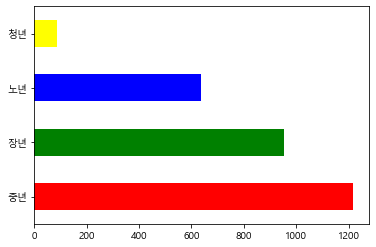

In [40]:
# 16. 카드 개설 인원을 청년, 중년, 장년, 노년으로 비교할 수 있도록 그래프로 표현하시오



<Figure size 720x432 with 0 Axes>

array([25,  2, 25, 14, 25, 25, 25, 24, 50, 25, 25, 25, 25, 22, 25, 25, 23,
       19, 25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 25, 50, 25, 25, 25,
       71, 75, 71, 25, 25, 75, 50, 50, 25, 25, 25, 50, 67, 31, 50, 25, 13,
        4, 22, 98, 16, 50, 44, 50, 25, 25, 25, 25, 25, 25, 25, 25, 25, 50,
       48, 68, 61, 25, 25,  3, 50, 46, 25, 25, 25, 25, 75, 29, 46, 20,  8,
       18, 17, 16, 19, 22, 10, 18,  6,  5,  3,  2], dtype=int64)

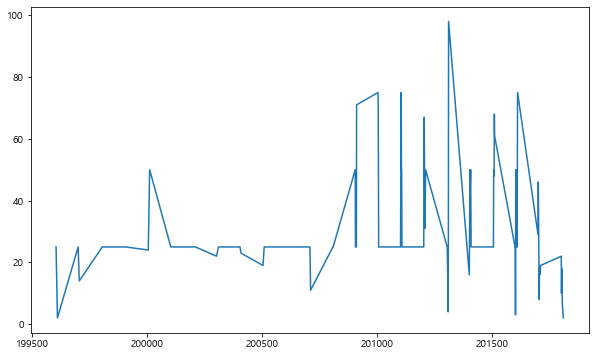

In [41]:
# 17 시간의 흐름에 따른 카드 개설 인원의 추이를 확인할 수 있는 그래프를 표현하시오.



# plt.hist(open_count)

<Figure size 720x720 with 0 Axes>

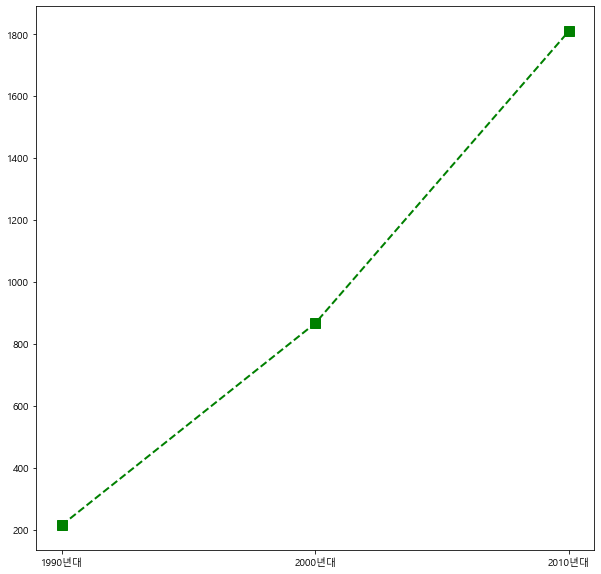

In [42]:
# 18 fin_data df를 이용하여 각 연대별 발급건수를 표현하는 피봇테이블을 생성하고 해당 테이블을 
# 사용하여 각 연대별 신용카드 발급 추이를 나타내는 그래프를 그리시오



In [43]:
# 19 신용카드의 각 연도별 발급건수를 계산하고 연도별 오름차순으로 정렬하시오.
# 결과를 변수에 저장하시오
y_count=fin_data['카드개설연도'].value_counts().sort_index()

<Figure size 720x432 with 0 Axes>

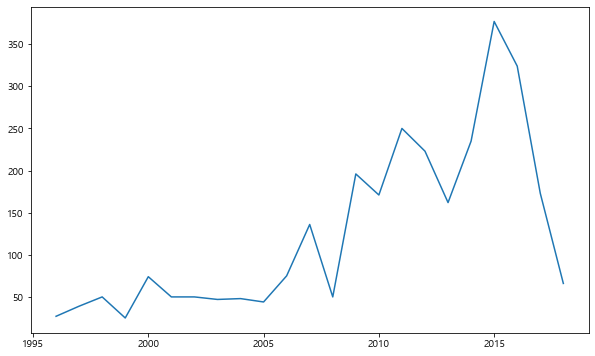

In [44]:
# 20 19번에서 저장한 변수의 데이터를 활용하여 연도별 
# 개설건수에 대하여 시계열 그래프로 표현하시오.
plt.figure(figsize=(10,6))
plt.plot(y_count)

In [45]:
# 21. 성별,연령대로 그룹화하여 카드 발급 건수를 표현하는 피봇테이블을 작성하고 변수에 저장하시오

c_count = 

![](문제21_피봇.png)

생년              
연령대   노년   장년   중년  청년
성별                    
남    182  200  704  50
여    454  753  513  36

발급건수              
     노년   장년   중년  청년
성별                   
남   182  200  704  50
여   454  753  513  36

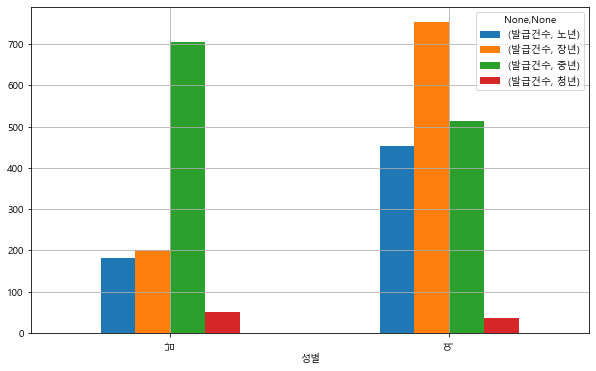

In [46]:
# 21. 21번에서 저장한 변수를 이용하여 아래와 같은 그래프를 작성하시오.
s=c_count.unstack(1)
s
